In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

from fontTools.misc.bezierTools import calcCubicArcLength

In [3]:
input_path_trans = r'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_glu_trans_all/seed_'
input_path_20 = r'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_20um/seed_'
saving_dir_path_20_25 = r'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/comparacion_Glu_ConSin/'
total_channels = 608

In [4]:
def saving_figures (fig_id, path = saving_dir_path_20_25):
    os.makedirs(path, exist_ok=True)
    fig_name = path + str(fig_id) +'.png'
    plt.savefig (fig_name, format = 'png')

In [5]:
# To create a list with path to data directories
data_dirs_paths_20 = []
seed_numbers_20 = []
for num in range (1,11,1):
    seed_num = str(num)
    while len (seed_num) < 5:
        seed_num = "0" + seed_num
    path_2_dir = input_path_20 + seed_num + "/"
    data_dirs_paths_20.append(path_2_dir)
    seed_numbers_20.append(seed_num)
data_dirs_paths_20

['C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_20um/seed_00001/',
 'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_20um/seed_00002/',
 'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_20um/seed_00003/',
 'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_20um/seed_00004/',
 'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_20um/seed_00005/',
 'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_20um/seed_00006/',
 'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_20um/seed_00007/',
 'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_20um/seed_00008/',
 'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_20um/seed_00009/',
 'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_20um/seed_00010/']

In [6]:
# To create a list with path to data directories
data_dirs_paths_trans = []
seed_numbers_trans = []
for num in range (1,11,1):
    seed_num = str(num)
    while len (seed_num) < 5:
        seed_num = "0" + seed_num
    path_2_dir = (input_path_trans+ seed_num + "/")
    data_dirs_paths_trans.append(path_2_dir)
    seed_numbers_trans.append(seed_num)
data_dirs_paths_trans

['C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_glu_trans_all/seed_00001/',
 'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_glu_trans_all/seed_00002/',
 'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_glu_trans_all/seed_00003/',
 'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_glu_trans_all/seed_00004/',
 'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_glu_trans_all/seed_00005/',
 'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_glu_trans_all/seed_00006/',
 'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_glu_trans_all/seed_00007/',
 'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_glu_trans_all/seed_00008/',
 'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_glu_trans_all/seed_00009/',
 'C:/Users/leonz/PyCharmMiscProject/Mcell_blender/react_data_glu_trans_all/seed_00010/']

In [7]:
# The files that we have in every directory
files = ["glu.Cube.dat", "glu.World.dat", "O.PSD.dat"]
files

['glu.Cube.dat', 'glu.World.dat', 'O.PSD.dat']

In [8]:
# Fetch data from every directory. Here every data is a list in a global list
cube_data_20 = []
world_data_20 = []
channel_data_20 = []
time = []
for dir_path in data_dirs_paths_20:
    index = 0
    for file in files:
        index += 1
        filename = dir_path + file
        f = [ line.rstrip ('\n') for line in open (filename).readlines() ]
        time = [ float (line.split (' ') [0]) for line in f]
        data = [ int (line.split (' ') [1]) for line in f]
        if index == 1:
            cube_data_20.append (data)
        elif index == 2:
            world_data_20.append (data)
        else:
            channel_data_20.append (data)
len (time), len (cube_data_20), len(world_data_20), len(channel_data_20)
# Now seed_0 data is the 0th item in each list, and seed_1 is the 1st item...

(3001, 10, 10, 10)

In [9]:
# Fetch data from every directory. Here every data is a list in a global list
cube_data_trans = []
world_data_trans = []
channel_data_trans = []
time = []
for dir_path in data_dirs_paths_trans:
    index = 0
    for file in files:
        index += 1
        filename = dir_path + file
        f = [ line.rstrip ('\n') for line in open (filename).readlines() ]
        time = [ float (line.split (' ') [0]) for line in f]
        data = [ int (line.split (' ') [1]) for line in f]
        if index == 1:
            cube_data_trans.append (data)
        elif index == 2:
            world_data_trans.append (data)
        else:
            channel_data_trans.append (data)
len (time), len (cube_data_trans), len(world_data_trans), len(channel_data_trans)
# Now seed_0 data is the 0th item in each list, and seed_1 is the 1st item...

(3001, 10, 10, 10)

In [10]:
# Calculate media from each data file

def calculate_mean (list_of_data):
    means = []
    num_replicates = len(list_of_data)
    num_data = len (list_of_data [0])
    for i in range (num_data):
        mean = 0
        for j in range (num_replicates):
            mean += (list_of_data[j][i])
        mean  = mean / num_replicates
        means.append(mean)
    return means


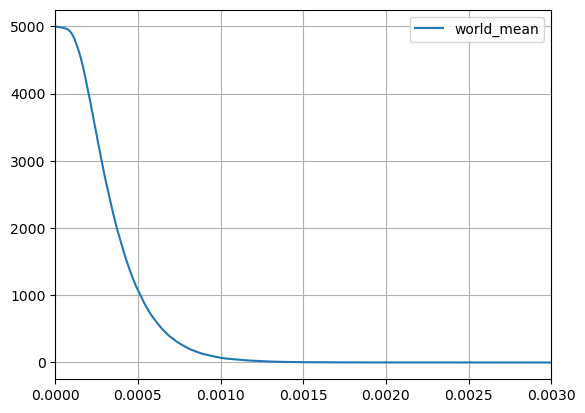

In [11]:
## Opened channel meanc
world_mean_20 = calculate_mean(world_data_20)
plt.plot (time, world_mean_20, label = "world_mean")
plt.xlim ([0, 0.003])
plt.grid (True)
plt.legend ()
plt.show ()

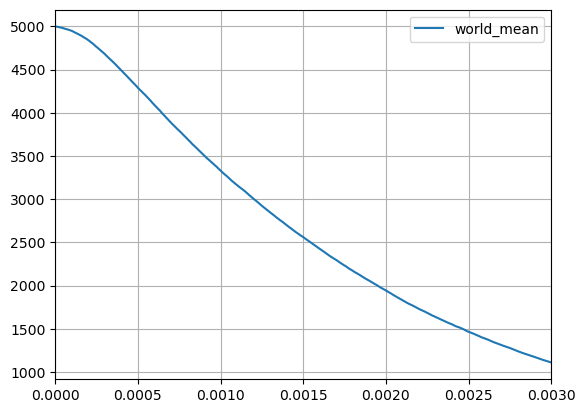

In [12]:
## Opened channel meanc
world_mean_trans = calculate_mean(world_data_trans)
plt.plot (time, world_mean_trans, label = "world_mean")
plt.xlim ([0, 0.003])
plt.grid (True)
plt.legend ()
plt.show ()

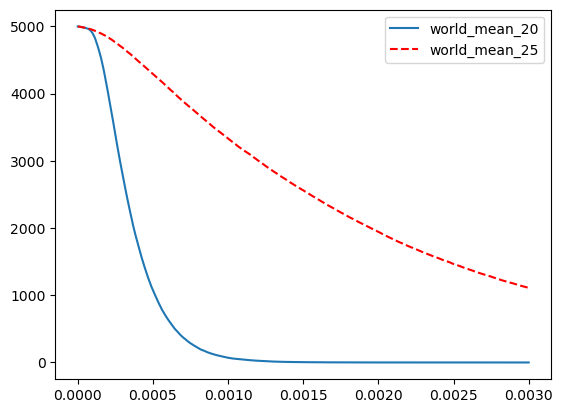

In [13]:
plt.plot (time, world_mean_20, label = "world_mean_20")
plt.plot (time, world_mean_trans, 'r--', label = "world_mean_25")
plt.legend ()
plt.show ()

In [14]:
NA = 6.022e23
vol_cube = 4.029e-3 #mum^3
vol_world = 6# mum^3
vol_cube_L = vol_cube /1e15
vol_world_L = vol_world /1e15
def convert_molar_concentration (num_molecules,volume, avogadro = NA):
    return (num_molecules/avogadro) / volume

In [15]:
molar_world_20 = []
for data in world_data_20:
    temp_list = []
    for mol_number in data:
        molar_concentration = convert_molar_concentration(mol_number, vol_world_L)
        temp_list.append(molar_concentration)
    molar_world_20.append(temp_list)
molar_world_20

[[1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3835381379386691e-06,
  1.3835381379386691e-06,
  1.3835381379386691e-06,
  1.3829846119783018e-06,
  1.382707848998118e-06,
  1.382707848998118e-06,
  1.382707848998118e-06,
  1.382707848998118e-06,
  1.382707848998118e-06,
  1.382707848998118e-06,
  1.3824310860179342e-06,
  1.3821543230377504e-06,
  1.3821543230377504e-06,
  1.3821543230377504e-06,
  1.3821543230377504e-06,
  1.3821543230377504e-06,
  1.3818775600575667e-06,
  1.3818775600575667e-06,
  1.3818775600575667e-06,
  1.3818775600575667e-06,
  1.381600797077383e-06,
  1.381600797077383e-06,
  1.381324034097199e-06,
  1.381324034097199e-

In [16]:
molar_world_trans = []
for data in world_data_trans:
    temp_list = []
    for mol_number in data:
        molar_concentration = convert_molar_concentration(mol_number, vol_world_L)
        temp_list.append(molar_concentration)
    molar_world_trans.append(temp_list)
molar_world_trans

[[1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3838149009188531e-06,
  1.3835381379386691e-06,
  1.3835381379386691e-06,
  1.3835381379386691e-06,
  1.3832613749584856e-06,
  1.3829846119783018e-06,
  1.3824310860179342e-06,
  1.3824310860179342e-06,
  1.3824310860179342e-06,
  1.3824310860179342e-06,
  1.3824310860179342e-06,
  1.3824310860179342e-06,
  1.3824310860179342e-06,
  1.3824310860179342e-06,
  1.3824310860179342e-06,
  1.3818775600575667e-06,
  1.381600797077383e-06,
  1.381600797077383e-06,
  1.381324034097199e-06,
  1.381324034097199e-06,
  1.381324034097199e-06,
  1.3810472711170155e-06,
  1.3810472711170

In [17]:
mean_molar_20 = calculate_mean(molar_world_20)
mean_molar_trans = calculate_mean (molar_world_trans)

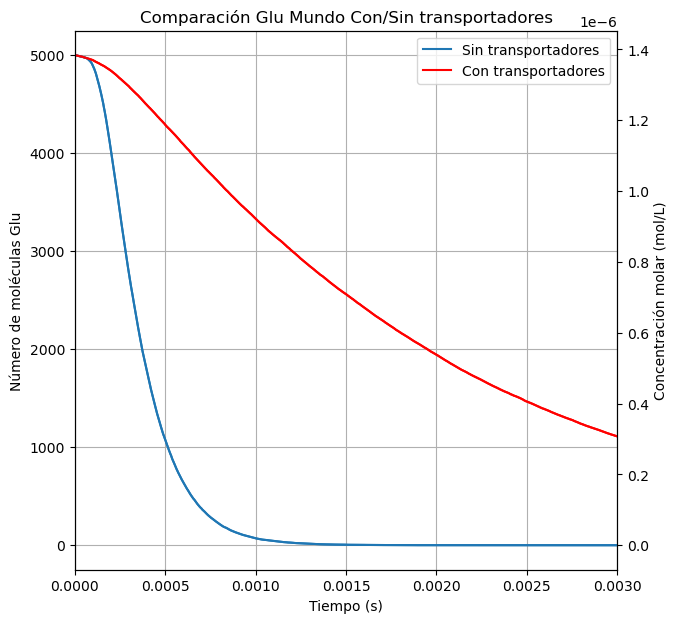

In [18]:
## Important plot

fig, ax1 = plt.subplots (figsize = (7,7))
ax1.plot (time, world_mean_20, label = "Sin transportadores")
ax1.plot (time, world_mean_trans, 'r', label = "Con transportadores")
ax1.grid (True)
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel ('Número de moléculas Glu')
ax1.legend ()
ax2 = ax1.twinx ()
ax2.plot (time, mean_molar_20)
ax2.plot (time, mean_molar_trans, 'r')
ax2.set_ylabel('Concentración molar (mol/L)')

plt.xlim ([0, 0.003])
plt.title ("Comparación Glu Mundo Con/Sin transportadores")

saving_figures ("Comparación Glu SiNoTrans")
plt.show ()

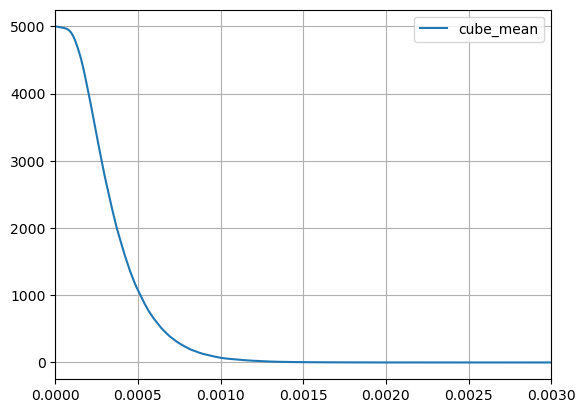

In [19]:
## Opened channel meanc
cube_mean_20 = calculate_mean(cube_data_20)
plt.plot (time, world_mean_20, label = "cube_mean")
plt.xlim ([0, 0.003])
plt.grid (True)
plt.legend ()
plt.show ()

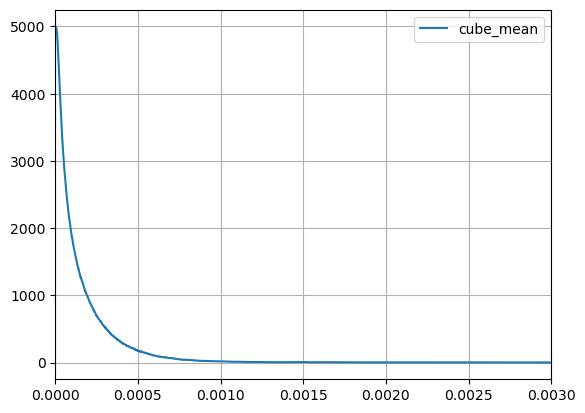

In [20]:
## Opened channel meanc
cube_mean_trans = calculate_mean(cube_data_trans)
plt.plot (time, cube_mean_trans, label = "cube_mean")
plt.xlim ([0, 0.003])
plt.grid (True)
plt.legend ()
plt.show ()

In [39]:
molar_cube_20 = []
for data in cube_data_20:
    temp_list = []
    for mol_number in data:
        molar_concentration = convert_molar_concentration(mol_number, vol_cube_L)
        temp_list.append(molar_concentration)
    molar_cube_20.append(temp_list)
molar_cube_20

[[0.002060781684168061,
  0.0020554236517892244,
  0.0020554236517892244,
  0.0020550114954523903,
  0.002054599339115557,
  0.002054599339115557,
  0.002052538557431389,
  0.0020508899320840542,
  0.0020434711180210494,
  0.002038525241979046,
  0.002029045646231873,
  0.002014208018105863,
  0.002003491953348189,
  0.00199566098294835,
  0.0019762896351171707,
  0.0019515602549071537,
  0.0019326010634128077,
  0.0019161148099394632,
  0.001889736804382112,
  0.001872838394571934,
  0.001852642734067087,
  0.0018225553214782334,
  0.0017998867229523847,
  0.0017693871540266973,
  0.0017364146470800084,
  0.0017224013316276654,
  0.0017013813584491513,
  0.001678300603586469,
  0.0016515104416922842,
  0.0016288418431664356,
  0.001612355589693091,
  0.0015818560207674038,
  0.0015694913306623954,
  0.001548471357483881,
  0.001524154133610698,
  0.0015101408181583552,
  0.0014854114379483385,
  0.0014718102788328293,
  0.0014470808986228126,
  0.0014334797395073034,
  0.0014202907367

In [40]:
molar_cube_trans = []
for data in cube_data_trans:
    temp_list = []
    for mol_number in data:
        molar_concentration = convert_molar_concentration(mol_number, vol_cube_L)
        temp_list.append(molar_concentration)
    molar_cube_trans.append(temp_list)
molar_cube_trans

[[0.002060781684168061,
  0.002054599339115557,
  0.002056660120799725,
  0.002052126401094555,
  0.0020562479644628913,
  0.0020550114954523903,
  0.0020517142447577215,
  0.0020488291503998864,
  0.002045944056042051,
  0.0020393495546527133,
  0.0020273970208845382,
  0.0020212146758320343,
  0.0020047284223586896,
  0.001991951575916848,
  0.001974641009769836,
  0.001952796723917655,
  0.0019391955648021453,
  0.001909932464886959,
  0.0018909732733926128,
  0.0018678925185299307,
  0.0018518184213934196,
  0.0018163729764257292,
  0.0017932922215630467,
  0.001771035779374032,
  0.0017463063991640152,
  0.001724049956975,
  0.001683658635965306,
  0.0016688210078392959,
  0.0016366728135662743,
  0.0016181257784087617,
  0.001588038365819908,
  0.001564545454620392,
  0.0015328094166842038,
  0.0015126137561793569,
  0.0015064314111268527,
  0.00149241809567451,
  0.0014808777182431687,
  0.0014553240253594847,
  0.0014408985535703082,
  0.0014227636747496295,
  0.001400095076223

In [41]:
mean_molar_cube_20 = calculate_mean(molar_cube_20)
mean_molar_cube_trans = calculate_mean(molar_cube_trans)

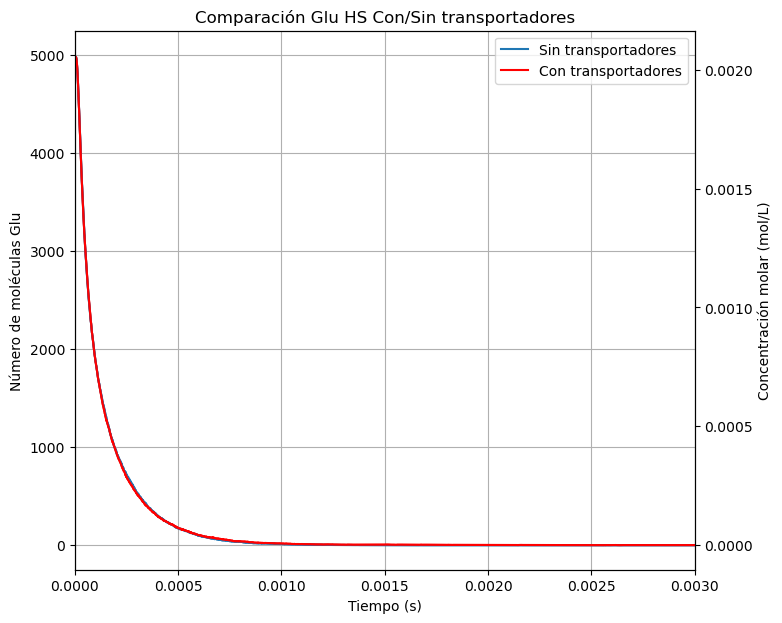

In [43]:
## Important plot

fig, ax1 = plt.subplots (figsize = (8,7))
ax1.plot (time, cube_mean_20, label = "Sin transportadores")
ax1.plot (time, cube_mean_trans, 'r', label = "Con transportadores")
ax1.grid (True)
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel ('Número de moléculas Glu')
ax1.legend ()
ax2 = ax1.twinx ()
ax2.plot (time, mean_molar_cube_20)
ax2.plot (time, mean_molar_cube_trans, 'r')
ax2.set_ylabel('Concentración molar (mol/L)')

plt.xlim ([0, 0.003])
plt.title ("Comparación Glu HS Con/Sin transportadores")

saving_figures ("Comparación Glu SiNoTrans HenSinap")
plt.show ()

In [30]:
channel_mean_20 = calculate_mean (channel_data_20)
channel_mean_trans = calculate_mean (channel_data_trans)# Get max number of channel opened
def get_curve_peak (x_ax, y_ax):
    y_peak = max (y_ax)
    max_index = y_ax.index (y_peak)
    x_peak = x_ax [max_index]
    return x_peak, y_peak
time_peak_20, channel_peak_20 = get_curve_peak (time, channel_mean_20)
time_peak_trans, channel_peak_trans = get_curve_peak(time, channel_mean_trans)

In [33]:
channel_per_data_20 = []
for channel in channel_data_20:
    temp_list = []
    for data in channel:
        percentage = (data/total_channels)*100
        temp_list.append(percentage)
    channel_per_data_20.append(temp_list)
channel_per_data_20 = calculate_mean(channel_per_data_20)

In [34]:
channel_per_data_trans = []
for channel in channel_data_trans:
    temp_list = []
    for data in channel:
        percentage = (data/total_channels)*100
        temp_list.append(percentage)
    channel_per_data_trans.append(temp_list)
channel_per_data_trans = calculate_mean(channel_per_data_trans)

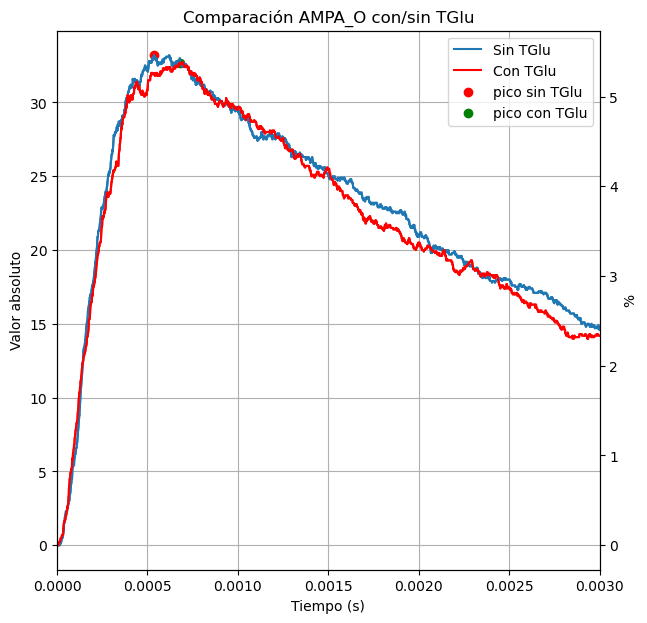

In [36]:
## Important plot

fig, ax1 = plt.subplots (figsize = (7,7))
ax1.plot (time, channel_mean_20, label = "Sin TGlu")
ax1.plot (time, channel_mean_trans, 'r', label = "Con TGlu ")
ax1.scatter (time_peak_20, channel_peak_20, color = "red", label = "pico sin TGlu")
ax1.scatter (time_peak_trans, channel_peak_trans, color = "green",  label = "pico con TGlu")
ax1.grid (True)
ax1.set_xlabel('Tiempo (s)')
ax1.set_ylabel ('Valor absoluto')
ax1.legend ()
ax2 = ax1.twinx ()
ax2.plot (time, channel_per_data_20)
ax2.plot (time, channel_per_data_trans, 'r')
ax2.set_ylabel('%')

plt.xlim ([0, 0.003])
plt.title ("Comparación AMPA_O con/sin TGlu")

saving_figures ("Comparación AMPA_O")
plt.show ()